# Crime Prediction

Analysis
- crime prediction
- find features that affect the seriousness of crimes

- feature preprocessing
  - data preprocessing
  - dimension reduction 
  - feature selection 
  - feature transformation
- modeling 
  - try different models
  - experiments: tune parameters
- feature monitoring 
  - feature importance evalution, find common features that have high feature importance



## Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
# TODO: Put your dataset in your google drive!
os.chdir('/content/drive/MyDrive/Coding Projects/DS/Project/Data/')
!ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 crime_features.csv
 crime_features_old.csv
 crime_preprocessed.csv
'Crimes in different Boroughs.jpg'
'Crime types.jpg'
'Jurisdiction responsible for incident.jpg'
'Level of offense.jpg'
'Name of NYCHA housing development of occurrence.jpg'
 NYPD_Complaint_Data_Current__Year_To_Date_.csv
 NYPD_Complaint_Incident_Level_Data_Footnotes.pdf
 NYPD_Complaint_YTD_DataDictionary.xlsx
'patrol borough in which the incident occurred.jpg'
 PDCode_PenalLaw.xlsx
'Specific location of occurrence in or around the premises.jpg'
'whether crime was successfully completed or attempted.jpg'


In [ ]:
data_path = "crime_features.csv"
df = pd.read_csv(data_path)
field_names = list(df.columns)

data_path = "NYPD_Complaint_Data_Current__Year_To_Date_.csv"
df2 = pd.read_csv(data_path)
field_names = list(df.columns)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,ADDR_PCT_CD,JURIS_DESC,OFNS_DESC,PREM_TYP_DESC,LAW_CAT_CD,FR_TIME,duration,FRONT OF,INSIDE,OPPOSITE OF,REAR OF,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,-0.333666,6,5,0.798697,0,22,0.216667,0,0,0,0,24,6,2,20,6,2
1,-0.476409,6,5,0.798697,0,0,0.216667,0,0,0,0,24,6,2,20,6,2
2,-1.561250,6,7,0.798697,0,16,0.216667,0,0,0,0,24,6,2,20,6,2
3,-0.590602,6,21,0.798697,0,16,0.216667,0,0,0,0,24,6,2,12,2,1
4,-0.504957,6,4,0.798697,1,15,0.216667,0,0,0,0,24,6,2,20,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445109,-0.105279,6,11,0.234507,2,7,0.250000,1,0,0,0,24,6,2,13,4,0
445110,0.551336,6,4,0.798697,0,4,0.216667,0,0,0,0,24,6,2,20,6,2
445111,-0.419312,6,18,-2.210316,1,9,0.033333,0,1,0,0,16,4,1,20,6,2
445112,1.065208,6,11,0.234507,2,19,0.083333,0,1,0,0,16,5,1,13,5,0


In [ ]:
print (list(df))
print (df.shape)

['ADDR_PCT_CD', 'JURIS_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'LAW_CAT_CD', 'FR_TIME', 'duration', 'FRONT OF', 'INSIDE', 'OPPOSITE OF', 'REAR OF', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']
(445114, 17)


In [ ]:
# prepare targets
print (pd.unique(df2['LAW_CAT_CD']))
print (pd.value_counts(df2['LAW_CAT_CD']))

df['serious_crime'] = df2['LAW_CAT_CD']
df['serious_crime'] = df['serious_crime'].map({'FELONY':'1',
                             'MISDEMEANOR':'1',
                             'VIOLATION':'0'},
                             na_action=None)

df_serious_crime = df['serious_crime']
print (pd.unique(df_serious_crime))
print (pd.value_counts(df_serious_crime))

df_serious_crime = pd.to_numeric(df_serious_crime)
print(df_serious_crime.dtypes)
print (pd.unique(df_serious_crime))

# prepare features
features = list(df)
features.remove('serious_crime')
features.remove('LAW_CAT_CD')
print (features)

['FELONY' 'MISDEMEANOR' 'VIOLATION']
MISDEMEANOR    225559
FELONY         148709
VIOLATION       75238
Name: LAW_CAT_CD, dtype: int64
['1' '0']
1    370583
0     74531
Name: serious_crime, dtype: int64
int64
[1 0]
['ADDR_PCT_CD', 'JURIS_DESC', 'OFNS_DESC', 'PREM_TYP_DESC', 'FR_TIME', 'duration', 'FRONT OF', 'INSIDE', 'OPPOSITE OF', 'REAR OF', 'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX']


In [ ]:
df[features]

,ADDR_PCT_CD,JURIS_DESC,OFNS_DESC,PREM_TYP_DESC,FR_TIME,duration,FRONT OF,INSIDE,OPPOSITE OF,REAR OF,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,-0.333666,6,5,0.798697,22,0.216667,0,0,0,0,24,6,2,20,6,2
1,-0.476409,6,5,0.798697,0,0.216667,0,0,0,0,24,6,2,20,6,2
2,-1.561250,6,7,0.798697,16,0.216667,0,0,0,0,24,6,2,20,6,2
3,-0.590602,6,21,0.798697,16,0.216667,0,0,0,0,24,6,2,12,2,1
4,-0.504957,6,4,0.798697,15,0.216667,0,0,0,0,24,6,2,20,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445109,-0.105279,6,11,0.234507,7,0.250000,1,0,0,0,24,6,2,13,4,0
445110,0.551336,6,4,0.798697,4,0.216667,0,0,0,0,24,6,2,20,6,2
445111,-0.419312,6,18,-2.210316,9,0.033333,0,1,0,0,16,4,1,20,6,2
445112,1.065208,6,11,0.234507,19,0.083333,0,1,0,0,16,5,1,13,5,0


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

y = df_serious_crime
x = np.array(df[features])
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2)

### Decision Tree Classifier

In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy = ', accuracy_dtc)
precision_dtc = precision_score(y_test,y_pred_dtc,average="weighted")
print ('Precision = ', precision_dtc)
recall_dtc = recall_score(y_test,y_pred_dtc,average="weighted")
print ('Recall = ', recall_dtc)
f1_score_dtc = f1_score(y_test,y_pred_dtc,average="weighted")
print ('F1 Score = ', f1_score_dtc)

Accuracy =  0.7055255383440234
Precision =  0.7188104838477376
Recall =  0.7055255383440234
F1 Score =  0.7119695286083358


 1. ADDR_PCT_CD          0.194689
 2. JURIS_DESC           0.174641
 3. OFNS_DESC            0.171382
 4. PREM_TYP_DESC        0.075773
 5. FR_TIME              0.071761
 6. duration             0.061298
 7. FRONT OF             0.059313
 8. INSIDE               0.042191
 9. OPPOSITE OF          0.036417
10. REAR OF              0.033836
11. SUSP_AGE_GROUP       0.032012
12. SUSP_RACE            0.015304
13. SUSP_SEX             0.014804
14. VIC_AGE_GROUP        0.008120
15. VIC_RACE             0.004473
16. VIC_SEX              0.003985


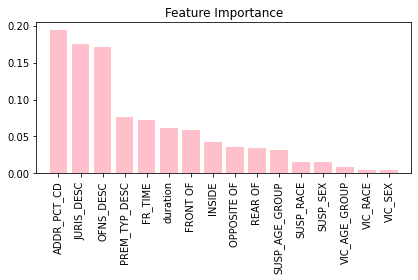

In [ ]:
# calculate feature importance

importances_dtc = dtc.feature_importances_

indices_dtc = np.argsort(importances_dtc)[::-1]
for f in range(X_train.shape[1]):
    print("%2d. %-*s %f" % (f + 1, 20, features[f], importances_dtc[indices_dtc[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_dtc[indices_dtc], color='pink', align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# The importance score is related to the importance_type hyperparameter.
# importance_type: we choose 'cover', because most features we use are enumeration features, and 'cover' is more friendly to enumeration features

imp_type = 'cover'
xgbc = XGBClassifier(importance_type=imp_type)
xgbc.fit(X_train, y_train)

y_pred_xgbc = xgbc.predict(X_test)
accuracy_xgbc = accuracy_score(y_test, y_pred_xgbc)
print('Accuracy = ', accuracy_xgbc)
precision_xgbc = precision_score(y_test,y_pred_xgbc,average="weighted")
print ('Precision = ', precision_xgbc)
recall_xgbc = recall_score(y_test,y_pred_xgbc,average="weighted")
print ('Recall = ', recall_xgbc)
f1_score_xgbc = f1_score(y_test,y_pred_xgbc,average="weighted")
print ('F1 Score = ', f1_score_xgbc)

Accuracy =  0.8305157094234075
Precision =  0.6897563435990657
Recall =  0.8305157094234075
F1 Score =  0.753619693126077


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('ADDR_PCT_CD', 0.0797131)
('JURIS_DESC', 0.10229946)
('OFNS_DESC', 0.060641177)
('PREM_TYP_DESC', 0.09186446)
('FR_TIME', 0.04434935)
('duration', 0.11025497)
('FRONT OF', 0.019873075)
('INSIDE', 0.010036824)
('OPPOSITE OF', 0.04196221)
('REAR OF', 0.0025916863)
('SUSP_AGE_GROUP', 0.07848382)
('SUSP_RACE', 0.10175305)
('SUSP_SEX', 0.013013882)
('VIC_AGE_GROUP', 0.11366443)
('VIC_RACE', 0.06725417)
('VIC_SEX', 0.062244315)


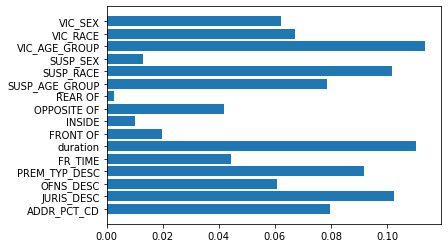

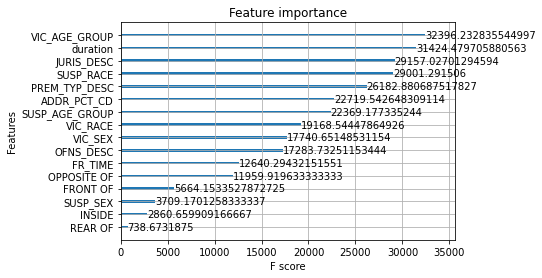

In [ ]:
# calculate feature importance

xgbc.get_booster().feature_names = features
importances_xgbc_2 = zip(features, xgbc.feature_importances_)
for f in importances_xgbc_2:
    print(f)
plt.barh(features, xgbc.feature_importances_)
plt.show()

plot_importance(xgbc, importance_type=imp_type)
plt.show()

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print('Accuracy = ', accuracy_rfc)
precision_rfc = precision_score(y_test,y_pred_rfc,average="weighted")
print ('Precision = ', precision_rfc)
recall_rfc = recall_score(y_test,y_pred_rfc,average="weighted")
print ('Recall = ', recall_rfc)
f1_score_rfc = f1_score(y_test,y_pred_rfc,average="weighted")
print ('F1 Score = ', f1_score_rfc)

Accuracy =  0.8236073823618616
Precision =  0.717753159090688
Recall =  0.8236073823618616
F1 Score =  0.7532502477893724


 1. ADDR_PCT_CD          0.211366
 2. JURIS_DESC           0.198986
 3. OFNS_DESC            0.153824
 4. PREM_TYP_DESC        0.081556
 5. FR_TIME              0.077162
 6. duration             0.049922
 7. FRONT OF             0.049130
 8. INSIDE               0.042547
 9. OPPOSITE OF          0.036899
10. REAR OF              0.027952
11. SUSP_AGE_GROUP       0.023721
12. SUSP_RACE            0.016286
13. SUSP_SEX             0.012962
14. VIC_AGE_GROUP        0.009887
15. VIC_RACE             0.004147
16. VIC_SEX              0.003656


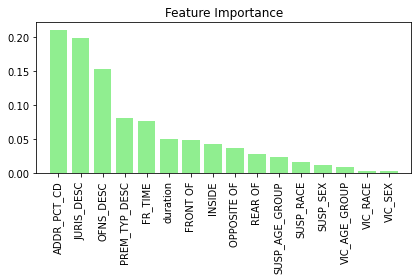

In [ ]:
# calculate feature importance

importances_rfc = rfc.feature_importances_

indices_rfc = np.argsort(importances_rfc)[::-1]
for f in range(X_train.shape[1]):
    print("%2d. %-*s %f" % (f + 1, 20, features[f], importances_rfc[indices_rfc[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_rfc[indices_rfc], color='lightgreen', align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
y_pred_nbc = nbc.predict(X_test)

accuracy_nbc = accuracy_score(y_test, y_pred_nbc)
print('Accuracy = ', accuracy_nbc)
precision_nbc = precision_score(y_test,y_pred_nbc,average="weighted")
print ('Precision = ', precision_nbc)
recall_nbc = recall_score(y_test,y_pred_nbc,average="weighted")
print ('Recall = ', recall_nbc)
f1_score_nbc = f1_score(y_test,y_pred_nbc,average="weighted")
print ('F1 Score = ', f1_score_nbc)

Accuracy =  0.8265841411769992
Precision =  0.7165150910951343
Recall =  0.8265841411769992
F1 Score =  0.7533479624594575


 1. ADDR_PCT_CD          0.000018
 2. JURIS_DESC           0.000004
 3. OFNS_DESC            0.000004
 4. PREM_TYP_DESC        0.000002
 5. FR_TIME              0.000002
 6. duration             0.000000
 7. FRONT OF             0.000000
 8. INSIDE               0.000000
 9. OPPOSITE OF          0.000000
10. REAR OF              0.000000
11. SUSP_AGE_GROUP       0.000000
12. SUSP_RACE            0.000000
13. SUSP_SEX             0.000000
14. VIC_AGE_GROUP        0.000000
15. VIC_RACE             0.000000
16. VIC_SEX              -0.000020


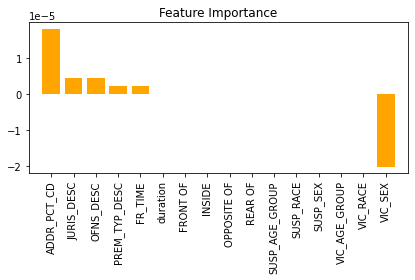

In [ ]:
# calculate feature importance

from sklearn.inspection import permutation_importance

imps_nbc = permutation_importance(nbc, X_test, y_test)
importances_nbc = imps_nbc.importances_mean
std = imps_nbc.importances_std
indices_nbc = np.argsort(importances_nbc)[::-1]

indices_nbc = np.argsort(importances_nbc)[::-1]
for f in range(X_train.shape[1]):
    print("%2d. %-*s %f" % (f + 1, 20, features[f], importances_nbc[indices_nbc[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_nbc[indices_nbc], color='orange', align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

y_pred_lr = LR.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy = ', accuracy_lr)
precision_lr = precision_score(y_test,y_pred_lr,average="weighted")
print ('Precision = ', precision_lr)
recall_lr = recall_score(y_test,y_pred_lr,average="weighted")
print ('Recall = ', recall_lr)
f1_score_lr = f1_score(y_test,y_pred_lr,average="weighted")
print ('F1 Score = ', f1_score_lr)

Accuracy =  0.8305157094234075
Precision =  0.6897563435990657
Recall =  0.8305157094234075
F1 Score =  0.753619693126077


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1. ADDR_PCT_CD          0.129603
 2. JURIS_DESC           0.031570
 3. OFNS_DESC            0.028140
 4. PREM_TYP_DESC        0.024376
 5. FR_TIME              0.023805
 6. duration             0.008200
 7. FRONT OF             0.003969
 8. INSIDE               0.003838
 9. OPPOSITE OF          0.001293
10. REAR OF              0.000000
11. SUSP_AGE_GROUP       -0.000427
12. SUSP_RACE            -0.000841
13. SUSP_SEX             -0.015865
14. VIC_AGE_GROUP        -0.016383
15. VIC_RACE             -0.017842
16. VIC_SEX              -0.044731


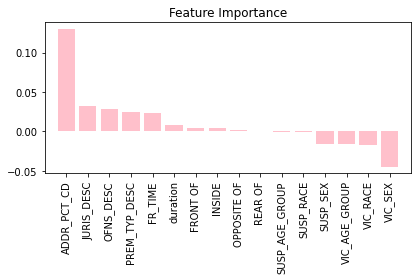

In [ ]:
from matplotlib import pyplot

importances_lr = LR.coef_[0]

indices_lr = np.argsort(importances_lr)[::-1]
for f in range(X_train.shape[1]):
    print("%2d. %-*s %f" % (f + 1, 20, features[f], importances_lr[indices_lr[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances_lr[indices_lr], color='pink', align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### LightGBM

In [ ]:
import lightgbm as lgb

imp_type = 'gain'
lgbc = lgb.LGBMClassifier(importance_type=imp_type)
lgbc.fit(X_train, y_train)

y_pred_lgb = lgbc.predict(X_test)

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print('Accuracy = ', accuracy_lgb)
precision_lgb = precision_score(y_test,y_pred_lgb,average="weighted")
print ('Precision = ', precision_lgb)
recall_lgb = recall_score(y_test,y_pred_lgb,average="weighted")
print ('Recall = ', recall_lgb)
f1_score_lgb = f1_score(y_test,y_pred_lgb,average="weighted")
print ('F1 Score = ', f1_score_lgb)

Accuracy =  0.8305157094234075
Precision =  0.6897563435990657
Recall =  0.8305157094234075
F1 Score =  0.753619693126077


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


('ADDR_PCT_CD', 2765.952253818512)
('JURIS_DESC', 256.54989194869995)
('OFNS_DESC', 1567.459338068962)
('PREM_TYP_DESC', 1616.431868493557)
('FR_TIME', 2438.769239962101)
('duration', 3093.274021744728)
('FRONT OF', 248.23868083953857)
('INSIDE', 126.93227028846741)
('OPPOSITE OF', 79.15486097335815)
('REAR OF', 42.874119997024536)
('SUSP_AGE_GROUP', 707.2357430458069)
('SUSP_RACE', 683.4263296127319)
('SUSP_SEX', 502.26421070098877)
('VIC_AGE_GROUP', 695.3348628878593)
('VIC_RACE', 817.0357753038406)
('VIC_SEX', 497.04601073265076)


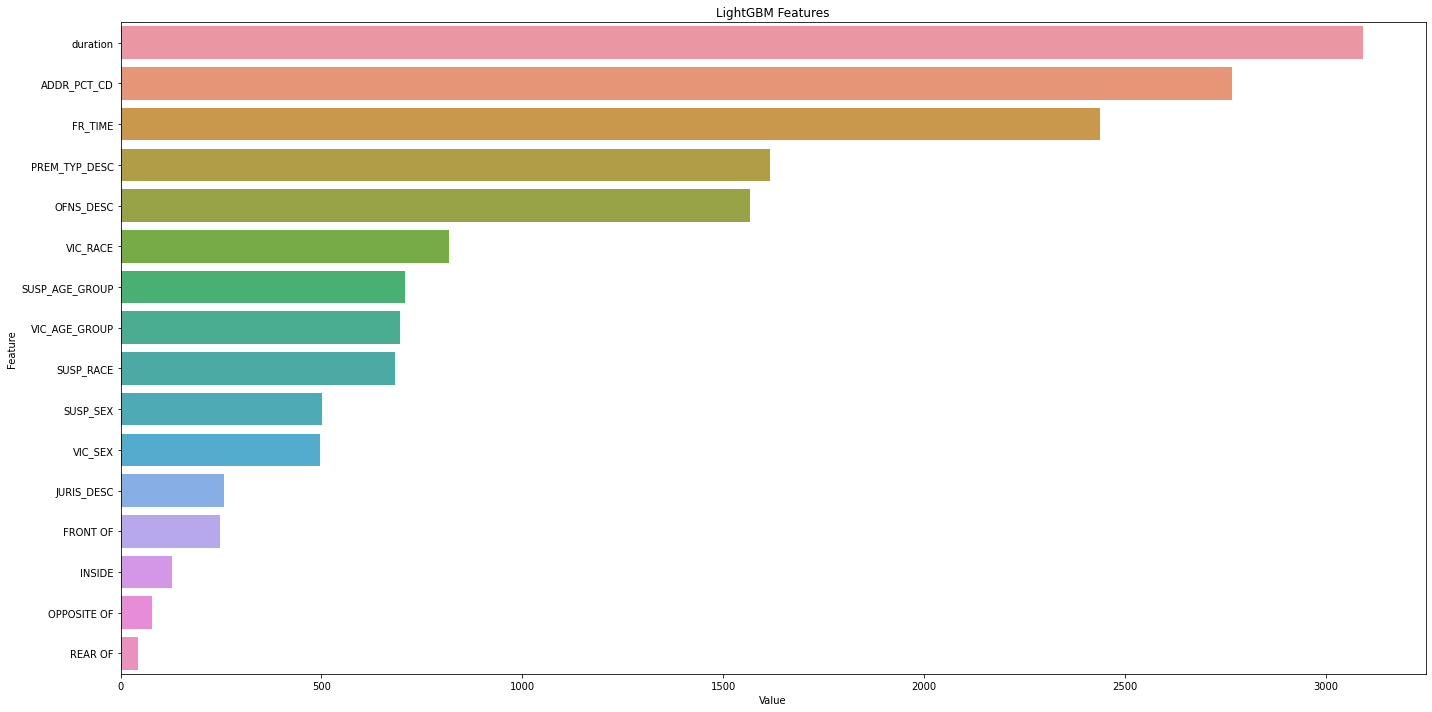

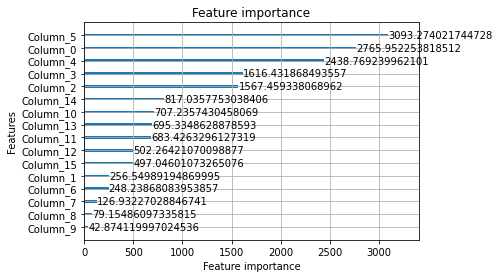

In [ ]:
# calculate feature importance

import seaborn as sns

importances_lgb = zip(features, lgbc.booster_.feature_importance(importance_type='gain'))
for f in importances_lgb:
    print(f)
feature_imp_lgb = pd.DataFrame(sorted(zip(lgbc.feature_importances_, features)), columns=['Value', 'Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_lgb.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
lgb.plot_importance(lgbc.booster_, importance_type=imp_type)
plt.show()

### Experimentation with Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators=10, random_state=90)

# cross validation; use a single metrics "f1 score weighted" to evaluate performance
score_pre = cross_val_score(rfc, x, y, cv=2, scoring='f1_weighted').mean()
score_pre

0.7524022570362141

max score：0.7564075723032315 n_estimators：41


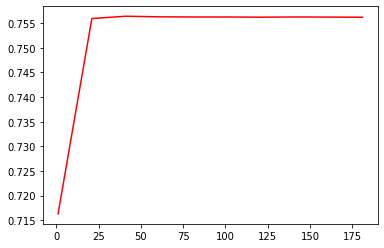

In [ ]:
# tune hyperparameters: n_estimators (most influential hyperparameter for random forest)

score_list = []

# build a RF every 20 steps, get scores of different n_estimators values
for i in range(0,200,20):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, x, y, cv=2, scoring='f1_weighted').mean()
    score_list.append(score)
score_max = max(score_list)
print('max score：{}'.format(score_max),
      'n_estimators：{}'.format(score_list.index(score_max)*20+1))

# plot learning curve
aa = np.arange(1,201,20)
plt.subplot(111)
plt.plot(aa, score_list, 'r-')
plt.show()

In [ ]:
# Reduce the value range of n_estimators to between 30-50

score_list = []

for i in range(30,50,2):
    rfc = RandomForestClassifier(n_estimators=i+1
                                ,random_state=90)
    score = cross_val_score(rfc, x, y, cv=2, scoring='f1_weighted').mean()
    score_list.append(score)
score_max = max(score_list)
print('max score：{}'.format(score_max),
      'n_estimators：{}'.format(score_list.index(score_max)*2+30))

max score：0.7564127112244228 n_estimators：38


In [ ]:
# build a RF with n_estimators=38

from sklearn import metrics

rfc = RandomForestClassifier(n_estimators=38, random_state=90)

# use GridSearch to select max_depth value
param_grid = {'max_depth':np.arange(1,20,2)}
GS = GridSearchCV(rfc, param_grid, cv=2, scoring='f1_weighted')
GS.fit(X_train, y_train)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 13} 0.7572055287688624


In [ ]:
# use the best model to predict
best_model=GS.best_estimator_
y_pred_rf_best=best_model.predict(X_test)
#metrics.f1_score(y_test, y_pred_rf_best)
f1_score_rf_best = f1_score(y_test,y_pred_rf_best,average="weighted")
print ('F1 Score = ', f1_score_rf_best)

F1 Score =  0.753619693126077
